In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
from keras import models
from keras import layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [12]:
from keras.utils import to_categorical
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0289 - acc: 0.9911
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0219 - acc: 0.9936
Epoch 3/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0170 - acc: 0.9948
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0130 - acc: 0.9965
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0097 - acc: 0.9972


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 127us/step


In [24]:
print('test_acc: ', test_acc)

test_acc:  0.979


In [25]:
digit = train_images[456]

In [26]:
import matplotlib.pyplot as plt

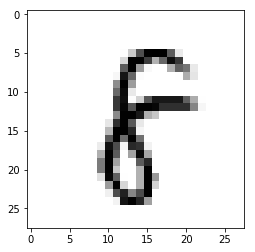

In [27]:
plt.imshow(digit.reshape((28,28)), cmap=plt.cm.binary)
plt.show()